# Apache Spark Koalas

<div class="alert alert-danger">

### <font color = #000000> <i> <b> El notebook fue corregido para trabajar con Pandas de PySpark.
### <font color = #000000> <i> <b> Las librería bokeh aún presentan errores en la aplicación

</div>

Este notebook contiene las funciones principales de Koalas, obtenidas de la documentación oficial de https://koalas.readthedocs.io/

In [2]:
##!pip install plotly

In [3]:
import sys
sys.executable

'C:\\Users\\HP\\anaconda3\\envs\\Process_Big_Data\\python.exe'

In [4]:
import findspark
findspark.init()
import pandas as pd
import pyspark
import numpy as np
import pyspark.pandas as ps ## accordingly to instruction for the same library now the built in version suits better
from pyspark.sql import SparkSession
import bokeh

C:\Users\HP\anaconda3\envs\Process_Big_Data\lib\site-packages\pyspark\pandas\__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


### 1. Creación de objetos



Creando una serie Koalas pasando una lista de valores, permitiendo que Koalas cree un índice entero predeterminado:

In [5]:
s = ps.Series([1, 3, 5, np.nan, 6, 8])

In [6]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creando un Koalas DataFrame pasando un dict de objetos que se pueden convertir a series.

In [7]:
kdf = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [8]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creando un DataFrame de pandas pasando una matriz numpy, con un índice de fecha y hora y columnas etiquetadas:

In [9]:
dates = pd.date_range('20130101', periods=6)

In [10]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [12]:
## Tenemos el dataframe de Pandas. De la librería Pandas
pdf

,A,B,C,D
2013-01-01,-0.578426,-0.203162,0.883580,0.494022
2013-01-02,-0.266070,-1.341674,-0.302900,1.251954
2013-01-03,1.120749,-0.466276,1.555752,-0.159083
2013-01-04,-0.096924,-0.239757,0.890989,1.199469
2013-01-05,-0.999853,-0.491379,-0.871502,-0.564303
2013-01-06,-1.135496,-1.075186,-0.667293,-0.314206


Ahora, este DataFrame de pandas se puede convertir en un DataFrame de Koalas

In [13]:
#El dataframe de Pandas los vamos a hacer DataFrame pero de PySpark.Pandas
kdf = ps.from_pandas(pdf)

In [14]:
type(kdf)

pyspark.pandas.frame.DataFrame

Sin embargo, se ve y se comporta igual que un DataFrame de pandas

In [15]:
kdf

,A,B,C,D
2013-01-01,-0.578426,-0.203162,0.883580,0.494022
2013-01-02,-0.266070,-1.341674,-0.302900,1.251954
2013-01-03,1.120749,-0.466276,1.555752,-0.159083
2013-01-04,-0.096924,-0.239757,0.890989,1.199469
2013-01-05,-0.999853,-0.491379,-0.871502,-0.564303
2013-01-06,-1.135496,-1.075186,-0.667293,-0.314206


Además, es posible crear un **PANDAS DataFrame desde Spark DataFrame**.

Creando un Spark DataFrame a partir de pandas DataFrame

In [16]:
## Used to create or retrieve an existing Spark session when working with PySpark (and Spark Koalas).
## A Spark session is an entry point to interact with Spark functionality
spark = SparkSession.builder.getOrCreate()

In [17]:
## Now with the 'session on' we can work with its functions
sdf = spark.createDataFrame(pdf)

In [18]:
## Ya se vio el DF con Pandas, con PySpark.Pandas ahora con Spark
sdf.show()

+--------------------+--------------------+-------------------+--------------------+
|                   A|                   B|                  C|                   D|
+--------------------+--------------------+-------------------+--------------------+
| -0.5784256101109071| -0.2031624101624395| 0.8835801206455084|  0.4940224172779758|
| -0.2660696573637411|  -1.341673918298976|-0.3029001060305344|  1.2519539794779255|
|  1.1207489724323458|-0.46627580993026413| 1.5557518968509294| -0.1590827261967784|
|-0.09692351225818613|-0.23975692032105198| 0.8909891451578678|  1.1994692475297097|
| -0.9998533011319406| -0.4913790011261747|-0.8715017267657355| -0.5643030694677542|
| -1.1354959028300111| -1.0751864948297716|-0.6672929764821113|-0.31420625050883827|
+--------------------+--------------------+-------------------+--------------------+



Creando Koalas DataFrame desde Spark DataFrame.
`to_koalas ()` se adjunta automáticamente a Spark DataFrame y está disponible como una API (application programm interface) cuando se importa Koalas. 

Pero ahora lo trabajamos con Pandas en Spark. Así lo recomienda la misma biblioteca

In [19]:
##Regrésalo de Spark a Koalas
kdf = sdf.pandas_api()

In [20]:
kdf

,A,B,C,D
0,-0.578426,-0.203162,0.883580,0.494022
1,-0.266070,-1.341674,-0.302900,1.251954
2,1.120749,-0.466276,1.555752,-0.159083
3,-0.096924,-0.239757,0.890989,1.199469
4,-0.999853,-0.491379,-0.871502,-0.564303
5,-1.135496,-1.075186,-0.667293,-0.314206


Tiene [dtypes] específicos. Actualmente se admiten los tipos que son comunes a Spark y pandas.

### <font color = #ff4fa4> <i> Ahora podemos ver que efectivamente se trabaja con la API de pyspark.pandas

In [21]:
type(kdf)

pyspark.pandas.frame.DataFrame

### 2. Manipulación de datos


A diferencia de los pandas, los datos en un dataframe de datos de Spark no están _ordenados_, no tienen una noción intrínseca de índice. Cuando se le solicite el encabezado, Spark solo tomará el número solicitado de filas de una partición. **No hay que utilizar el df de Koalas para devolver filas específicas**, use `.loc` o` iloc` en su lugar.

In [22]:
kdf.head()

,A,B,C,D
0,-0.578426,-0.203162,0.883580,0.494022
1,-0.266070,-1.341674,-0.302900,1.251954
2,1.120749,-0.466276,1.555752,-0.159083
3,-0.096924,-0.239757,0.890989,1.199469
4,-0.999853,-0.491379,-0.871502,-0.564303


Muestre el índice, las columnas y los datos numéricos subyacentes.

También puede recuperar el índice; la columna de índice se puede atribuir a un DataFrame, ver más adelante

In [23]:
kdf.index

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [24]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

Converts a pandas-on-Spark DataFrame (kdf) into a NumPy array

Pero kdf sigue siendo Pyspark Pandas ya que no lo almacenamos

In [25]:
kdf.to_numpy()

C:\Users\HP\anaconda3\envs\Process_Big_Data\lib\site-packages\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


array([[-0.57842561, -0.20316241,  0.88358012,  0.49402242],
       [-0.26606966, -1.34167392, -0.30290011,  1.25195398],
       [ 1.12074897, -0.46627581,  1.5557519 , -0.15908273],
       [-0.09692351, -0.23975692,  0.89098915,  1.19946925],
       [-0.9998533 , -0.491379  , -0.87150173, -0.56430307],
       [-1.1354959 , -1.07518649, -0.66729298, -0.31420625]])

**Describe** muestra un resumen estadístico rápido de sus datos. 

### <font color = #ff4fa4> <i> Siendo aun PySpark.Pandas.

In [26]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.326003,-0.636239,0.248104,0.317976
std,0.815136,0.465819,0.992184,0.785620
min,-1.135496,-1.341674,-0.871502,-0.564303
25%,-0.999853,-1.075186,-0.667293,-0.314206
50%,-0.578426,-0.491379,-0.302900,-0.159083
75%,-0.096924,-0.239757,0.890989,1.199469
max,1.120749,-0.203162,1.555752,1.251954


Transposición de sus datos

In [27]:
kdf.T

,0,1,2,3,4,5
A,-0.578426,-0.266070,1.120749,-0.096924,-0.999853,-1.135496
B,-0.203162,-1.341674,-0.466276,-0.239757,-0.491379,-1.075186
C,0.883580,-0.302900,1.555752,0.890989,-0.871502,-0.667293
D,0.494022,1.251954,-0.159083,1.199469,-0.564303,-0.314206


Ordenando por su índice

In [28]:
kdf.sort_index(ascending=False)

,A,B,C,D
5,-1.135496,-1.075186,-0.667293,-0.314206
4,-0.999853,-0.491379,-0.871502,-0.564303
3,-0.096924,-0.239757,0.890989,1.199469
2,1.120749,-0.466276,1.555752,-0.159083
1,-0.266070,-1.341674,-0.302900,1.251954
0,-0.578426,-0.203162,0.883580,0.494022


Ordenar por valor

En este caso es la columna B

In [29]:
kdf.sort_values(by='B')

,A,B,C,D
1,-0.266070,-1.341674,-0.302900,1.251954
5,-1.135496,-1.075186,-0.667293,-0.314206
4,-0.999853,-0.491379,-0.871502,-0.564303
2,1.120749,-0.466276,1.555752,-0.159083
3,-0.096924,-0.239757,0.890989,1.199469
0,-0.578426,-0.203162,0.883580,0.494022


### 3. Datos faltantes
Koalas utiliza principalmente el valor `np.nan` para representar los datos faltantes. Por defecto, no se incluye en los cálculos.


### <font color = #ff4fa4> <i> Pero aquí usamos Pyspark.Pandas

La varianle pdf1 toma los 5 primeros rows, usa las mismas columnas que pd anterior (ayudado con list() y suma la columna E)

In [30]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

A la columna E, los primeros 2 rows, les asigna el valor de 1

In [31]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

### <font color = #ff4fa4> <i> .Transforma Pandas a pyspark.Pandas

In [32]:
kdf1 = ps.from_pandas(pdf1)
type(kdf1)

pyspark.pandas.frame.DataFrame

In [33]:
kdf1

,A,B,C,D,E
2013-01-01,-0.578426,-0.203162,0.883580,0.494022,1.0
2013-01-02,-0.266070,-1.341674,-0.302900,1.251954,1.0
2013-01-03,1.120749,-0.466276,1.555752,-0.159083,NaN
2013-01-04,-0.096924,-0.239757,0.890989,1.199469,NaN


Para eliminar las filas que tienen datos faltantes.

In [34]:
kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.578426,-0.203162,0.88358,0.494022,1.0
2013-01-02,-0.266070,-1.341674,-0.30290,1.251954,1.0


Llenando los datos faltantes.

Nunca se alteró la variable, por lo que kdf1 permanece aún con los NA

In [35]:
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.578426,-0.203162,0.883580,0.494022,1.0
2013-01-02,-0.266070,-1.341674,-0.302900,1.251954,1.0
2013-01-03,1.120749,-0.466276,1.555752,-0.159083,5.0
2013-01-04,-0.096924,-0.239757,0.890989,1.199469,5.0


### 4. Operaciones

#### Estadísticas
Las operaciones en general excluyen los datos faltantes.

Realización de una estadística descriptiva:

In [36]:
kdf.mean()

A   -0.326003
B   -0.636239
C    0.248104
D    0.317976
dtype: float64

#### Configuraciones de Spark

Varias configuraciones en PySpark se pueden aplicar internamente en Koalas.
Por ejemplo, puede habilitar la optimización de Arrow para acelerar enormemente la conversión de pandas internos.

Hemos hecho la misma operación pero para la API de Pandas con Pyspark

<div class="alert alert-info">
<h3>
<font color="#0000"><i><b> Why Use It?: If you're working with large datasets, enabling Arrow can significantly speed up the process of moving data <span style="background-color: #ffff00; font-weight: bold;">between Spark and Pandas</span>. However, if you don't have Arrow enabled and your datasets are small, you might not notice a difference.
</h3>
</div>

This setting helps to prevent overhead and potential performance issues when working with large datasets. Using a distributed index can lead to more efficient computations, especially in a cluster environment

In [37]:
prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ps.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [38]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ps.range(300000).to_pandas()

362 ms ± 62.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### <font color = #ff4fa4> <i> <b> Why Use It? </b>: Using %timeit is a quick way to benchmark the performance of a specific operation. It will run the code multiple times and provide an average execution time, helping you assess how long it takes to convert the DataFrame to pandas

 It measures the time it takes to create a pandas-on-Spark DataFrame with 300,000 rows and then convert it to a pandas DataFrame.

In [39]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ps.range(300000).to_pandas()

1.89 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### <font color = #ff4fa4> <i>  Con los valores ya dados, vemos que la operacipón de transformación a Pandas toma: 
> * <b> 540 ms de Arrow = True
> * <b> 21200 ms de Arrow = False

In [40]:
ps.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

#### Agrupación
Por "agrupar por" nos referimos a un proceso que involucra uno o más de los siguientes pasos:

- Dividir los datos en grupos según algunos criterios.
- Aplicar una función a cada grupo de forma independiente
- Combinar los resultados en una estructura de datos

In [41]:
kdf = ps.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [42]:
kdf

,A,B,C,D
0,foo,one,-0.075164,-0.856808
1,bar,one,0.112133,0.959135
2,foo,two,-0.614298,-0.495132
3,bar,three,0.098375,-0.069611
4,foo,two,1.316061,-0.484432
5,bar,two,1.264816,-0.451909
6,foo,one,-0.124515,0.169135
7,foo,three,0.427282,-0.286580


Agrupar y luego aplicar el **sum** a los grupos resultantes.

A diferencia de otros softwares (como PowerQuery) ambos métodos reconocen los valores sumables y aplican la operación

In [43]:
kdf.groupby('A').sum()

,C,D
A,,
bar,1.475325,0.437615
foo,0.929368,-1.953818


In [44]:
kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one   -0.199678 -0.687674
bar one    0.112133  0.959135
foo two    0.701764 -0.979564
bar three  0.098375 -0.069611
    two    1.264816 -0.451909
foo three  0.427282 -0.286580

### 5. Visualización de datos: Generar gráficos


La función da 1000 valores aleatores del 0 al 1 (como datos) y da mil periodos comenzando por la fecha dada (como index)

In [45]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

Transforma pd a Pandas de PySpark

In [46]:
kser = ps.Series(pser)

In [47]:
kser = kser.cummax()
kser

2000-01-01   -0.263790
2000-01-02   -0.263790
2000-01-03   -0.213809
2000-01-04   -0.213809
2000-01-05   -0.213809
2000-01-06    0.007920
2000-01-07    0.682854
2000-01-08    0.682854
2000-01-09    0.682854
2000-01-10    0.682854
2000-01-11    0.682854
2000-01-12    1.212562
2000-01-13    1.212562
2000-01-14    1.670041
2000-01-15    1.670041
2000-01-16    1.670041
2000-01-17    1.670041
2000-01-18    1.670041
2000-01-19    1.670041
2000-01-20    1.670041
2000-01-21    1.670041
2000-01-22    1.670041
2000-01-23    1.670041
2000-01-24    1.670041
2000-01-25    1.670041
2000-01-26    1.670041
2000-01-27    2.270854
2000-01-28    2.270854
2000-01-29    2.270854
2000-01-30    2.270854
2000-01-31    2.270854
2000-02-01    2.270854
2000-02-02    2.270854
2000-02-03    2.270854
2000-02-04    2.270854
2000-02-05    2.270854
2000-02-06    2.270854
2000-02-07    2.270854
2000-02-08    2.270854
2000-02-09    2.270854
2000-02-10    2.270854
2000-02-11    2.270854
2000-02-12    2.270854
2000-02-13 

**Gráficos de matplotlib**

The backend determines how plots are rendered and which libraries are used for visualizations. By setting the backend to "matplotlib," you enable Pandas PySpark to use Matplotlib for creating plots

<Axes: >

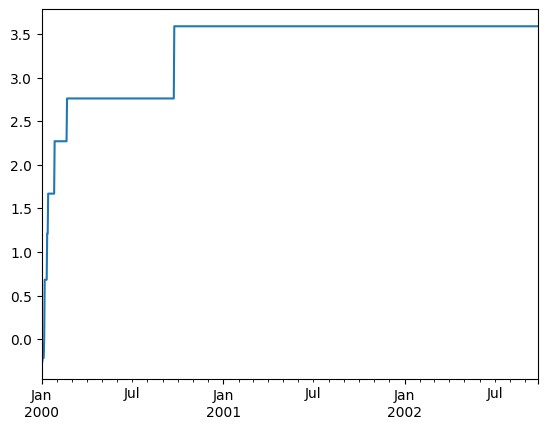

In [48]:
ps.options.plotting.backend = "matplotlib"

kser.plot()

**Gráficos de Pandas Bokeh**

### <font color = #ff4fa4> <i> <b>We must install pandas-bokeh

In [49]:
ps.options.plotting.backend = "pandas_bokeh"

##kser.plot(backend="pandas_bokeh", title="Example Figure")
kser.plot()


AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width

In [52]:
import pyspark.pandas as ps

# Set the plotting backend to pandas_bokeh
ps.options.plotting.backend = "pandas_bokeh"

# Example Series
kser = ps.Series([1, 2, 3, 4, 5])

# Plot with title using Bokeh
kser.plot()

# Default plot using the set backend
kser.plot()


AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width

**Gráfico por defecto con plotly**

In [51]:
kser.plot()

AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width

En un DataFrame, el plot() es una conveniencia para trazar todas las columnas con etiquetas:

In [53]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [54]:
kdf = ps.from_pandas(pdf)

In [55]:
kdf = kdf.cummax()
kdf

,A,B,C,D
2000-01-01,-0.990981,-1.813508,0.754762,0.556880
2000-01-02,0.300407,0.627534,0.754762,0.556880
2000-01-03,0.300407,0.627534,0.754762,0.556880
2000-01-04,0.300407,0.627534,0.945711,0.556880
2000-01-05,0.300407,0.627534,0.945711,0.580255
2000-01-06,1.714990,0.627534,1.525780,0.580255
2000-01-07,1.753595,0.627534,1.525780,0.580255
2000-01-08,1.753595,0.627534,1.525780,1.018196
2000-01-09,1.753595,0.627534,1.525780,1.994913
2000-01-10,1.753595,1.039267,1.525780,1.994913


In [58]:
# Convert back to Pandas DataFrame for plotting
pdf_for_plotting = kdf.to_pandas()

<Axes: title={'center': 'hello'}>

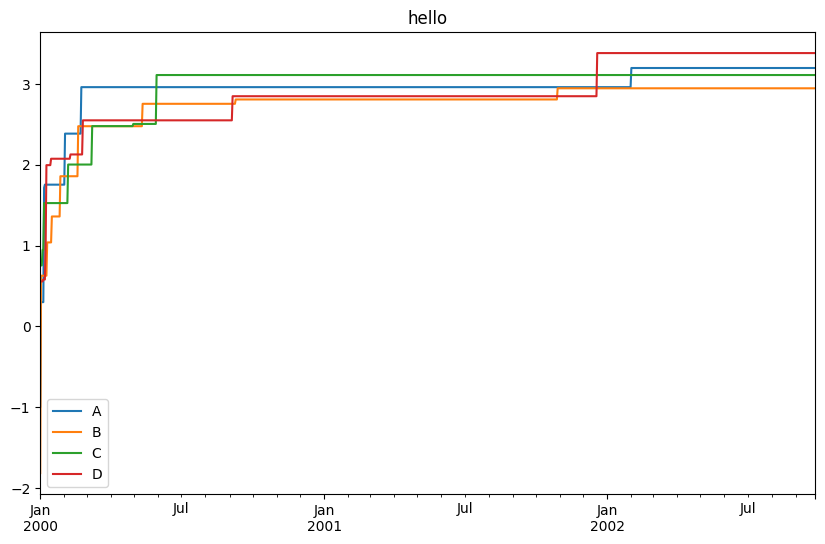

In [68]:
# Plotting
pdf_for_plotting.plot(kind='line', figsize=(10, 6), title = 'hello')



In [56]:
kdf.plot()

AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width

### 6. Entrada / salida de datos


### CSV

CSV es sencillo y fácil de usar

In [ ]:
kdf.to_csv('foo.csv')
ks.read_csv('foo.csv').head(10)

### Parquet

Parquet es un formato de archivo eficiente y compacto para leer y escribir más rápido.

In [ ]:
kdf.to_parquet('bar.parquet')
ks.read_parquet('bar.parquet').head(10)

### Spark IO

Además, Koalas es totalmente compatible con las diversas fuentes de datos de Spark, como ORC y una fuente de datos externa.

In [ ]:
kdf.to_spark_io('zoo.orc', format="orc")
ks.read_spark_io('zoo.orc', format="orc").head(10)